<a href="https://colab.research.google.com/github/AkashSalmuthe/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Business Objective:**




  
* **Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.** 


* **We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.**




* **Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.**

* **So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters**.

* ***The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.***
 



In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import warnings 
warnings.filterwarnings('ignore')

# **1. Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Projects/3. Supervised Learning - Classification/Credit Card Default Prediction - Akash Salmuthe/default_of_credit_card_clients.xlsx')


In [5]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Get rid of first row and use second row as a header

In [6]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Projects/3. Supervised Learning - Classification/Credit Card Default Prediction - Akash Salmuthe/default_of_credit_card_clients.xlsx',header=1)

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### ***Dataset has 30000 rows and 25 columns***
### ***All columns are numeric***

In [9]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* ***default payment next month is our target variable we need to focus on this***

# **2. Features description**

**Breakdown of Our Features:**

***We have records of 30000 customers. Below are the description of all features we have***.

* ***ID: ID of each client*** 

* ***LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)***

* ***SEX: Gender (1 = male, 2 = female)*** 

* ***EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)***

* ***MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)***

* ***AGE: Age in years***

**Scale for PAY_0 to PAY_6** : 

***(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

* ***PAY_0: Repayment status in September, 2005 (scale same as above***) 

* ***PAY_2: Repayment status in August, 2005 (scale same as above)***

* ***PAY_3: Repayment status in July, 2005 (scale same as above)***

* ***PAY_4: Repayment status in June, 2005 (scale same as above)***

* ***PAY_5: Repayment status in May, 2005 (scale same as above)***

* ***PAY_6: Repayment status in April, 2005 (scale same as above)***

* ***BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)***

* ***BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)***

* ***BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)***

* ***BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)***

* ***BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)***

* ***BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)***

* ***PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)***
* ***PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)***

* ***PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)***

* ***PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)***

* ***PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)***

* ***PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)***

* ***default.payment.next.month: Default payment (1=yes, 0=no)***

**NOTE:-**

 **What do 0 and -2 mean in PAY_X columns?**

***From dataset documentation:***

**PAY_0: Repayment status in September, 2005 (-1=pay delay, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation**. 
 
#### -2: No consumption; <br>-1: Paid in full; <br>0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.


## **3. Preprocessing the dataset**

### 3.1 Looking for missing values

In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [12]:
df.isna().sum().sum()

0

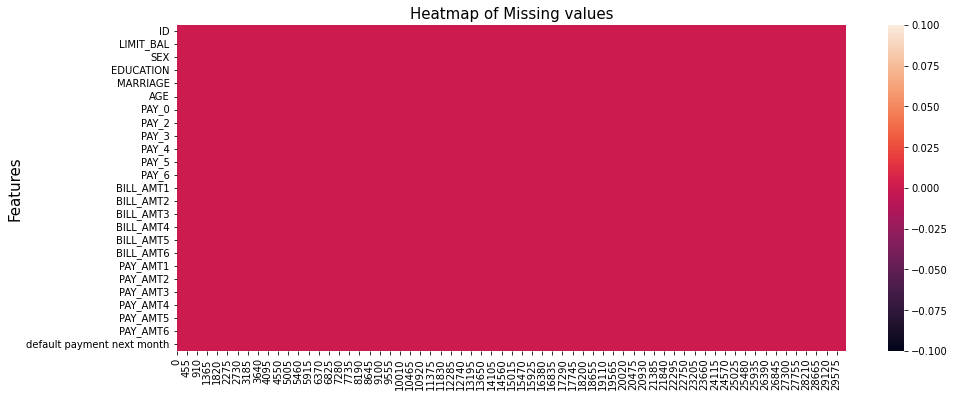

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull().T)

plt.title("Heatmap of Missing values",fontsize=15)
#plt.xlable("Feature",fontsize=15)
plt.ylabel("Features",fontsize=15)
plt.show()

### 3.2 Looking for Duplicate values

In [14]:
dv = df.duplicated().sum()

print(f'In dataset, {dv} Duplicate values are present')

In dataset, 0 Duplicate values are present


# **4. Exploratory Data Analysis**

### **Dependent Column**

In [15]:
#rename the default payment next month column to IsDefaulter

df.rename(columns={'default payment next month':'IsDefaulter'}, inplace=True)

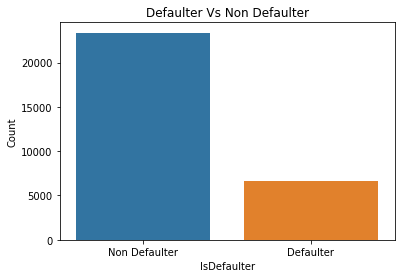

In [16]:
#plot countplot of IsDefaulter

ax=sns.countplot(df['IsDefaulter'])

#set title and labels
plt.title('Defaulter Vs Non Defaulter')
plt.xlabel('IsDefaulter')
plt.ylabel('Count')

ax.set_xticklabels(['Non Defaulter', 'Defaulter'])
plt.show()

## **Independent Columns**

### **1. SEX**

In [17]:
#checking unique values
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

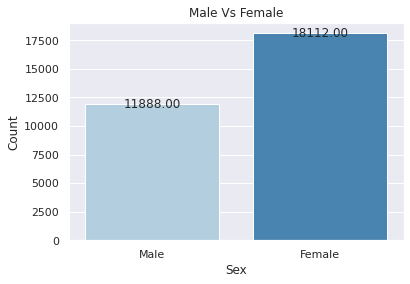

In [23]:
#plot countplot of SEX
sns.set(style='darkgrid')
ax=sns.countplot(df['SEX'],palette='Blues')

#set title and labels
plt.title('Male Vs Female')
plt.xlabel('Sex')
plt.ylabel('Count')

ax.set_xticklabels(['Male', 'Female'])

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')
plt.show()

### **2. EDUCATION**

In [21]:
# Unique values of EDUCATION column
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [24]:
# Aggregating values 4,5 and 6 to 0 as there are not much records in them

df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

[Text(0, 0, 'Others'),
 Text(0, 0, 'Graduate School'),
 Text(0, 0, 'University'),
 Text(0, 0, 'high school')]

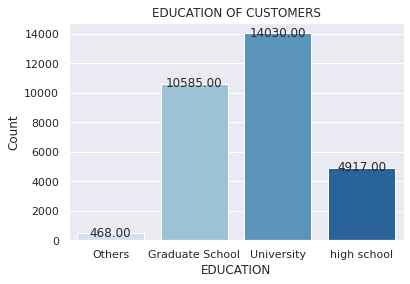

In [26]:
#plot countplot of EDUCATION
ax=sns.countplot(df['EDUCATION'],palette='Blues')

#set title and labels
plt.title('EDUCATION OF CUSTOMERS')
plt.xlabel('EDUCATION')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')

ax.set_xticklabels(['Others', 'Graduate School', 'University', 'high school'])

### **3. MARRIAGE** 

In [27]:
#checkingunique values of MARRIAGE column
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [28]:
# There are not much records in 3 and 0 values.
# Therefore, aggregating them

df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

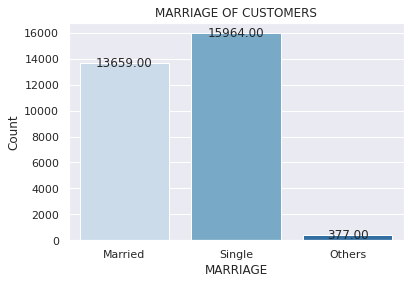

In [30]:
#plot countplot of MARRIAGE
ax=sns.countplot(df['MARRIAGE'],palette='Blues')

#set title and labels
plt.title('MARRIAGE OF CUSTOMERS')
plt.xlabel('MARRIAGE')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width() / 2., p.get_height()+30),
                    ha = 'center',va = 'center')
#set x axis labels
ax.set_xticklabels(['Married', 'Single', 'Others'])
plt.show()

In [31]:
#Create new Dataframe for categorical variables

df_cat = df[['SEX', 'EDUCATION', 'MARRIAGE']].copy()
df_cat['Defaulter'] = df['IsDefaulter']

#replace all values in categorical varibles with original names
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

## **Delayed Payments**

With respect to SEX

In [32]:
#percentage fucntion to show on top of bars

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12,verticalalignment='bottom')
    plt.show()

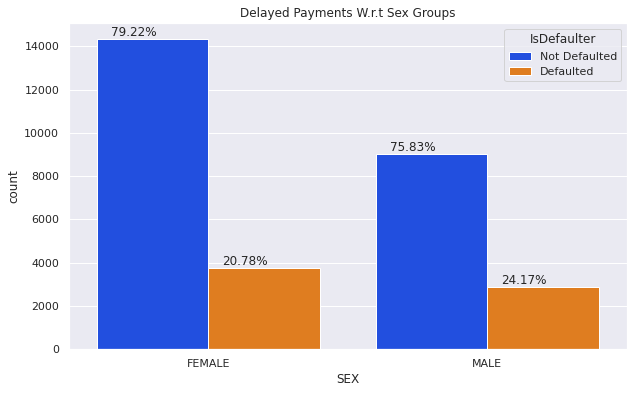

In [33]:
#Plotting sex and defaulter data in df_cat using countplot

plt.figure(figsize = (10,6))
ax = sns.countplot(x="SEX", hue="Defaulter",data =df_cat, palette='bright')
plt.title('Delayed Payments W.r.t Sex Groups')
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.SEX,2,2)

Males and Females are almost similar in Defaulting

### **Education w.r.t Defaulters**

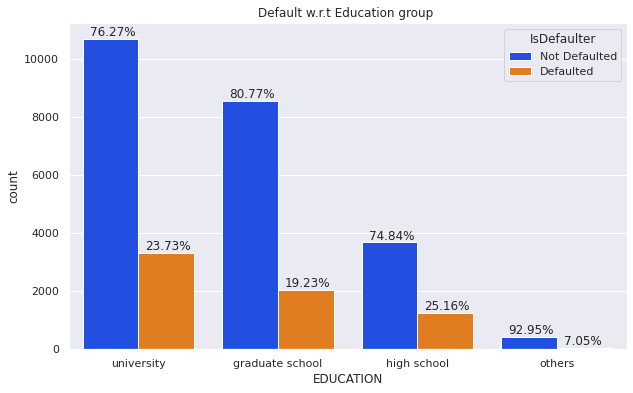

In [34]:
#Plotting data using countplot

plt.figure(figsize = (10,6))
ax = sns.countplot(x='EDUCATION',hue='Defaulter',data=df_cat,palette='bright')
plt.title("Default w.r.t Education group ")
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.EDUCATION,4,2)
plt.show()

University Group Defaulted More compare to others

### **Sex and Education w.r.t Defaulters**

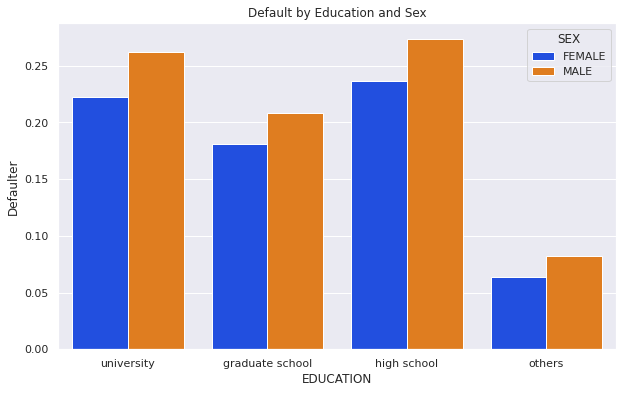

In [35]:
#Plotting data using countplot
plt.figure(figsize = (10,6))
sns.barplot(x="EDUCATION", y="Defaulter", hue="SEX", data=df_cat,palette='bright', ci=None)
plt.title("Default by Education and Sex")
plt.show()

In all Education groups , Male members have defaulted more. On that particularly high school male members are defaulted higher than others.

### **Maritual status w.r.t Defaulters**

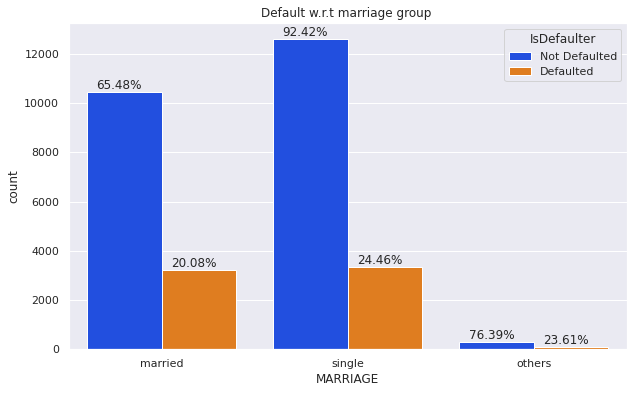

In [37]:
#Plotting data using countplot

plt.figure(figsize = (10,6))
ax = sns.countplot(x='MARRIAGE',hue='Defaulter',data=df_cat,palette='bright')
plt.title("Default w.r.t marriage group ")
plt.legend(title='IsDefaulter',loc = 'upper right',labels=['Not Defaulted','Defaulted'])
with_hue(ax,df_cat.MARRIAGE,3,2)
plt.show()

### **Age wise defaulters**

In [38]:
#rename PAY_0 to PAY_1
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [39]:
#create a condition to check whhether the customer defaulted even once

default_once = (df.PAY_1>1) | (df.PAY_2>1) | (df.PAY_3>1) | (df.PAY_4>1) | (df.PAY_5>1) | (df.PAY_6>1)

df.loc[default_once, "has_def"] = 1

df.loc[df.has_def.isna(), "has_def"] = 0

In [40]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,has_def
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.779867,0.728486,0.0,1.00,2.0,2.00,3.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Min age is 21 and maximum age is 79. hence create some some bins to group them.

In [42]:
#create age bins for AGE column

bins = [21, 30, 40, 50, 60, 70, 80]

labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

df_age = df['AGE']
df_age

0        24
1        26
2        34
3        37
4        57
         ..
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64

In [43]:
df_age['AGE'] = pd.cut(df_age, bins=bins, labels=labels,right=False)

In [45]:
# create a function to create stacked bargraph with percentage
def stacked_bar(column_name):
    
    #get the percentage of default by each group
    group_default = pd.crosstab(index = df['has_def'],columns= df_age[column_name], normalize='columns')

    #round the percentage to 2 decimal places
    group_default = group_default.apply(lambda x: round(x,2))

    #create labels for the stacked bar plot
    labels = group_default.columns
    list1 = group_default.iloc[0].to_list()
    list2 = group_default.iloc[1].to_list()

    #create names for list1 and list2
    list1_name = 'No Default'
    list2_name = 'Has Default'

    #create title for the plot defaly by column_name
    title = 'Default by ' + column_name

    #create xlabel and ylabel for the plot
    xlabel = column_name
    ylabel = 'Percentage'

    #set figure size
    fig, ax = plt.subplots(figsize=(10,6))
    bar_width = 0.50

    #set axis labels
    ax1 = ax.bar(labels, list1, bar_width, label=list1_name)
    ax2 = ax.bar(labels, list2, bar_width, label=list2_name, bottom=list1)

 #set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #set legend
    plt.legend(loc = 'best')

    #set tick labels
    plt.xticks(list(range(len(labels))), labels, rotation=90)
    plt.yticks(np.arange(0, 1.1, 0.1))

    #set grid
    plt.grid(True)

    #set heights and get texts for bars in axis 1 and 2
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")


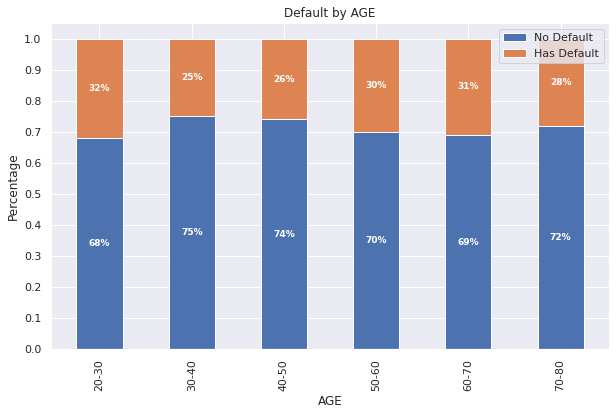

In [46]:
stacked_bar('AGE')

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

### **Credit Limit w.r.t Defaulters**

Text(0, 0.5, 'LIMIT_BAL')

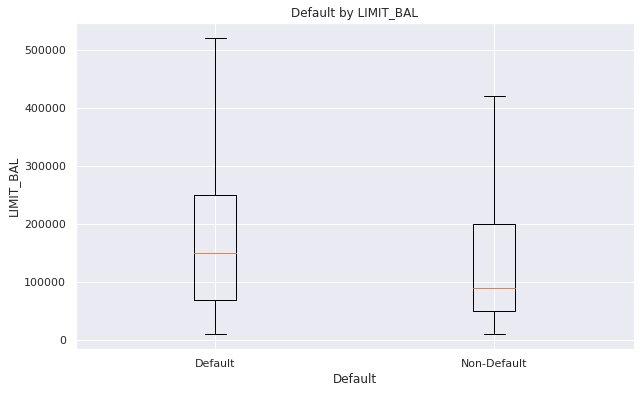

In [47]:
#create dfs for default and non-default with LIMIT_BAL column

def0 = df.loc[df['IsDefaulter'] == 0,'LIMIT_BAL']
def1 = df.loc[df['IsDefaulter'] == 1,'LIMIT_BAL']

#plot the boxplot for default and non-default
plt.figure(figsize=(10,6))
plt.boxplot([def0, def1], labels=['Default', 'Non-Default'], showfliers=False)

#set title and axis labels
plt.title('Default by LIMIT_BAL')
plt.xlabel('Default')
plt.ylabel('LIMIT_BAL')

Customers with high credit limits tend to have higher 'no-default'rate.

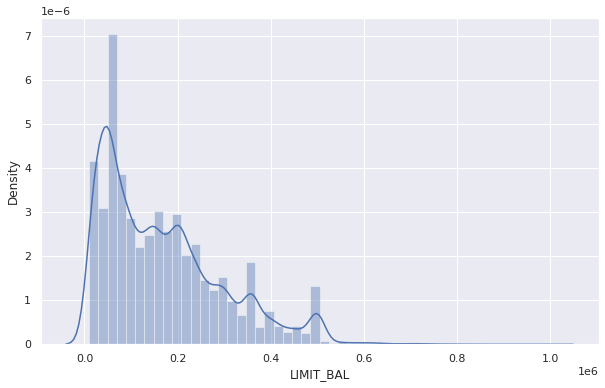

In [48]:
#distplot for LIMIT_BAL
plt.figure(figsize=(10,6))
sns.distplot(df['LIMIT_BAL'],kde=True,bins=50)

In [49]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,has_def
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1.0
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1.0
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0.0


## **Bill Amount Columns**

In [50]:
#rename the PAY COLUMNS
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}, inplace=True)

#rename the BILL_AMT COLUMNS
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace=True)

#rename the PAY_AMT COLUMNS
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace=True)

In [51]:
#create bill_amount_ df with bill_amount_sept, bill_amount_aug, bill_amount_jul, bill_amount_jun, bill_amount_may, bill_amount_apr

bill_amount_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]

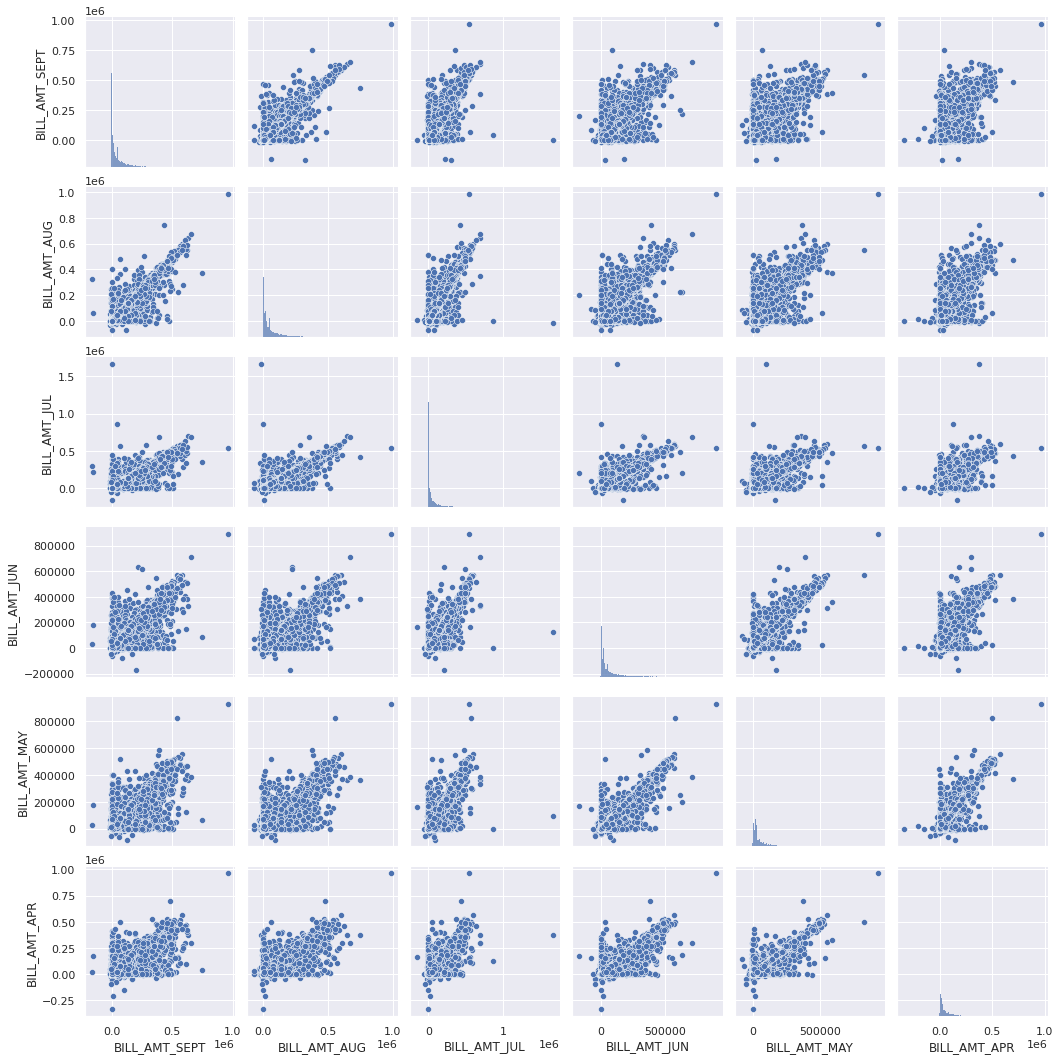

In [52]:
#plot pairplot for bill_amount_df
sns.pairplot(bill_amount_df)

### **Payment Status**

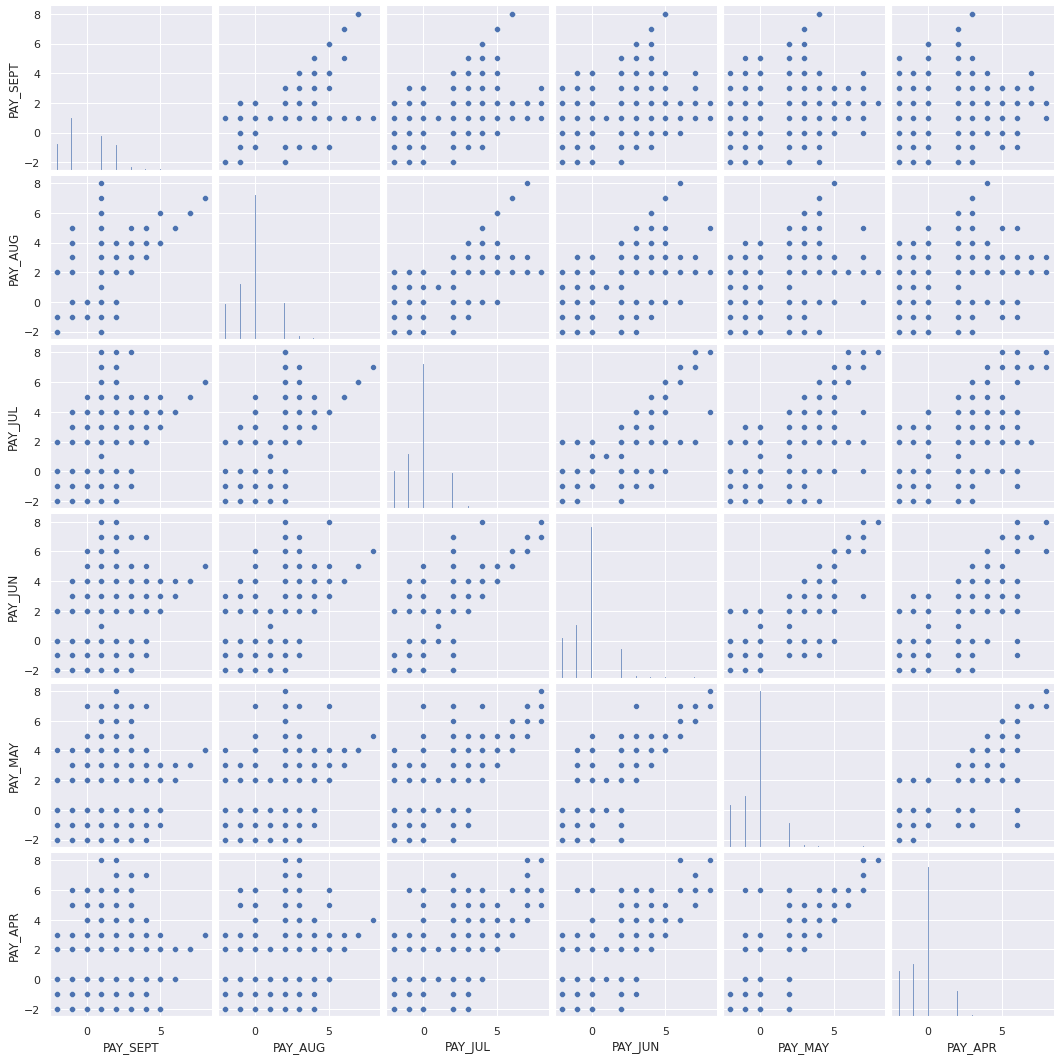

In [53]:
pay_columns_df = df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']]

#plot pairplot for pay_columns
sns.pairplot(pay_columns_df)

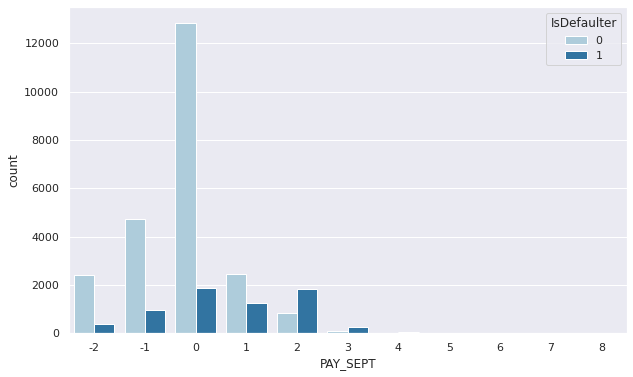

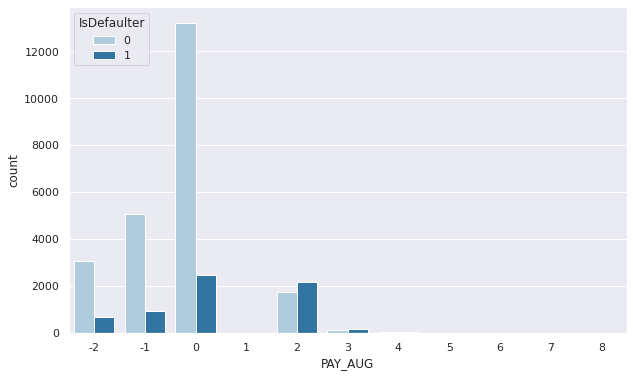

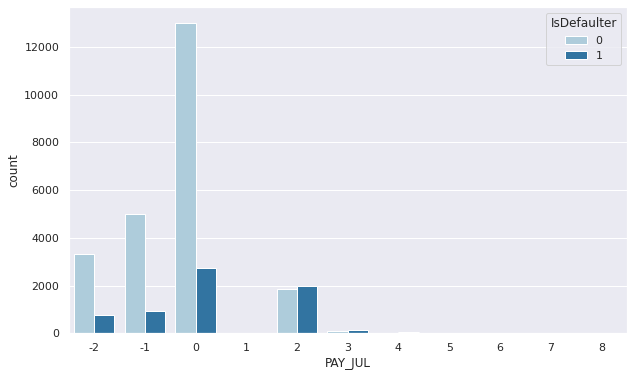

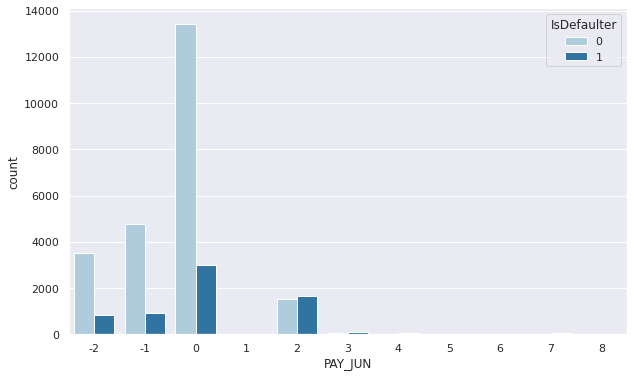

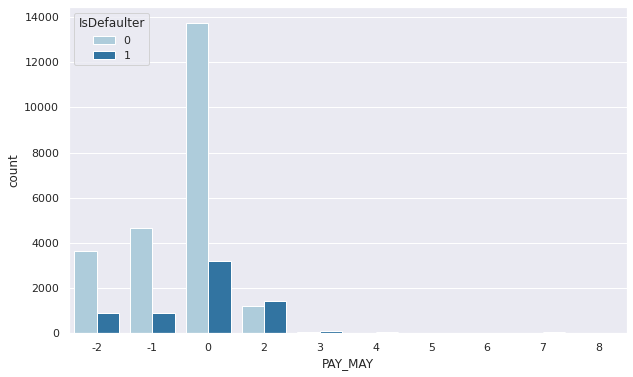

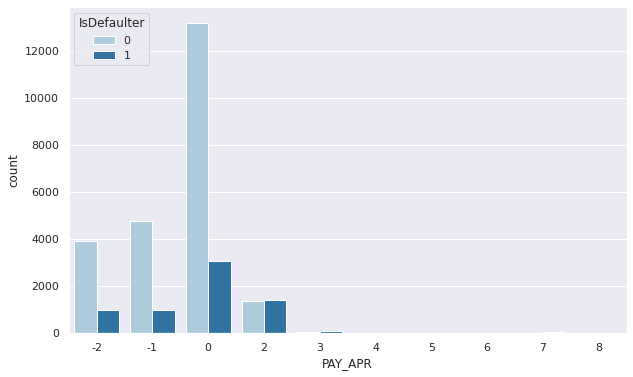

In [55]:
#create a col with pay cols
pay_columns = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

#create countplot for each column in pay_amount_col
for i in pay_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(x=i, data=df, hue='IsDefaulter',palette='Paired')

### **Already Paid Amounts**

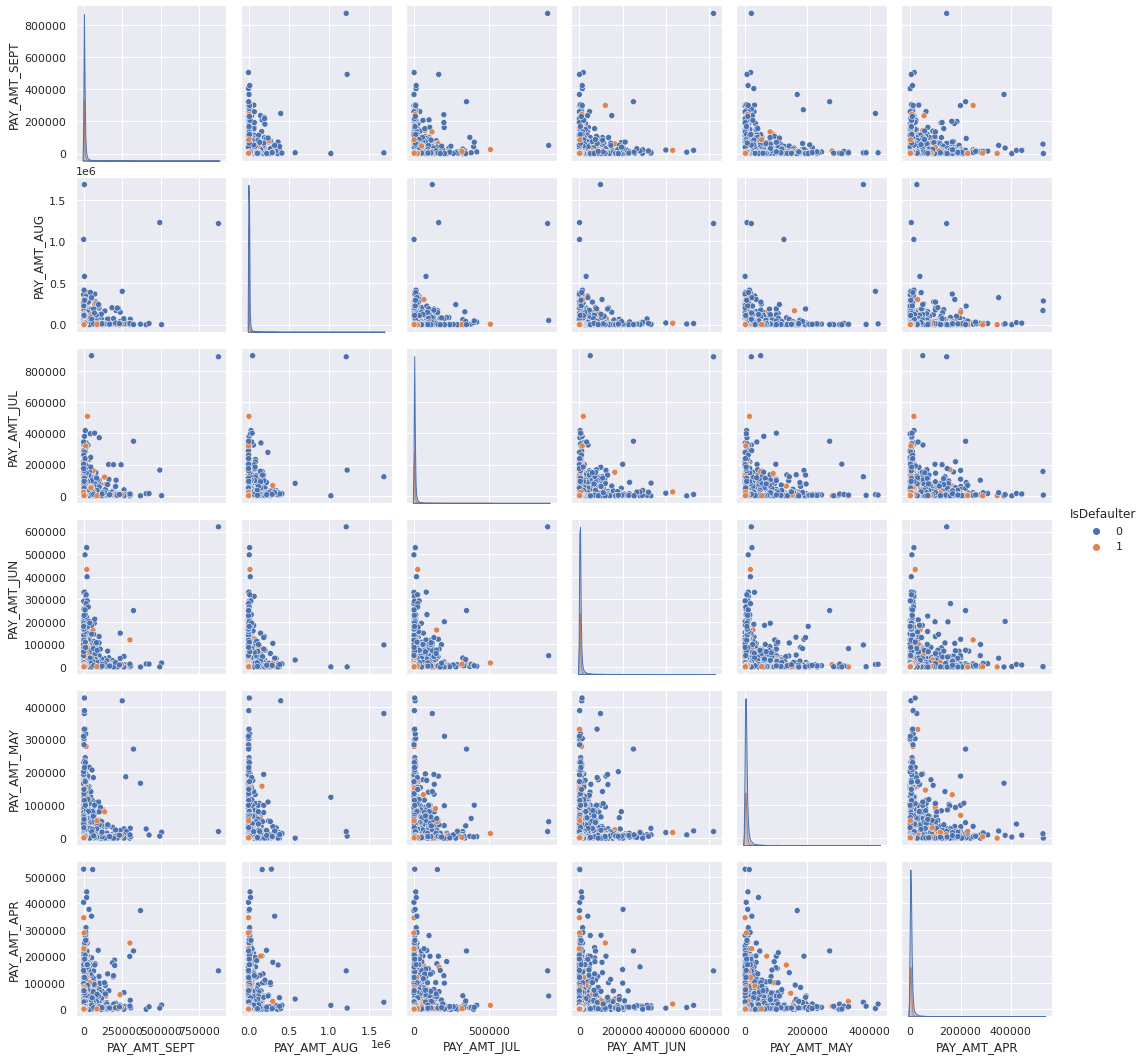

In [56]:
#Plotting paid amount using pairplot
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

# **Imbalanced Data Set of Target Variable**

Problems with imbalanced data classification If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class? Let’s explain it with an example of disease diagnosis. Let’s assume we are going to predict disease from an existing dataset where for every 100 records only 5 patients are diagnosed with the disease. So, the majority class is 95% with no disease and the minority class is only 5% with the disease. Now, assume our model predicts that all 100 out of 100 patients have no disease.

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix. It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the above case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%.

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset.

accuracy matrix Approach to deal with the imbalanced dataset problem In rare cases like fraud detection or disease prediction, it is vital to identify the minority classes correctly. So model should not be biased to detect only the majority class but should give equal weight or importance towards the minority class too. Here I discuss some of the few techniques which can deal with this problem. There is no right method or wrong method in this, different techniques work well with different problems.

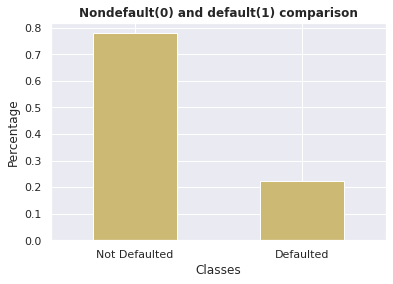

In [60]:
#create a df df for is default column
imb_df = df['IsDefaulter'].value_counts(normalize=True)

ax=imb_df.plot(kind='bar',color='y')

plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

In [61]:
imb_df

0    0.7788
1    0.2212
Name: IsDefaulter, dtype: float64

## **Applying SMOTE Technique**

In [62]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(oversampled_Y))

Original dataset shape 30000
Resampled dataset shape 46728


## **Feature Engineering On Columns**

In [63]:
#creating columns list
columns = list(df.columns)

In [64]:
#Remove the last column
columns.pop()

'has_def'

In [65]:
#Create a new Dataframe with balanced data
balanced_df = pd.DataFrame(oversampled_X,columns=columns)

In [66]:
balanced_df['IsDefaulter'] = oversampled_Y

In [67]:
#check shape of new daatframe
balanced_df.shape

(46728, 25)

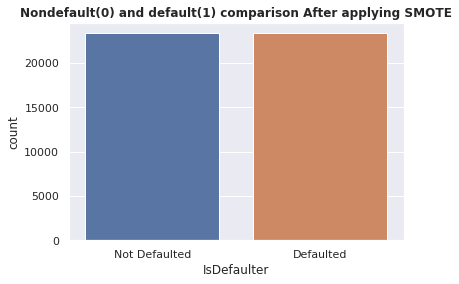

In [68]:
#plotting balanced data using countplot
ax = sns.countplot('IsDefaulter', data = balanced_df)
plt.title('Nondefault(0) and default(1) comparison After applying SMOTE',fontweight = "bold")
ax.set_xticklabels(('Not Defaulted','Defaulted'),rotation=0)
plt.show()

In [69]:
#creating new column 
balanced_df['Payement_Value'] = balanced_df['PAY_SEPT'] + balanced_df['PAY_AUG'] + balanced_df['PAY_JUL'] + balanced_df['PAY_JUN'] + balanced_df['PAY_MAY'] + balanced_df['PAY_APR']


In [70]:
#check mean of new feature wrt to default
balanced_df.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.980140
1    1.702234
Name: Payement_Value, dtype: float64

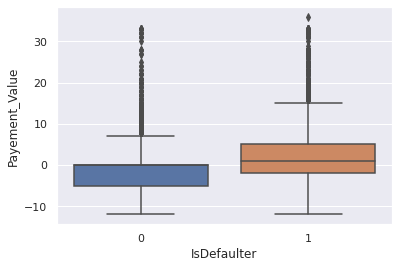

In [71]:
#Plot new feature using boxplot
sns.boxplot(data = balanced_df, x = 'IsDefaulter', y = 'Payement_Value' )

In [73]:
#create new feature dues
balanced_df['Dues'] = (balanced_df['BILL_AMT_APR']+balanced_df['BILL_AMT_MAY']+balanced_df['BILL_AMT_JUN']+balanced_df['BILL_AMT_JUL']+balanced_df['BILL_AMT_SEPT'])-(balanced_df['PAY_AMT_APR']+balanced_df['PAY_AMT_MAY']+balanced_df['PAY_AMT_JUN']+balanced_df['PAY_AMT_JUL']+balanced_df['PAY_AMT_AUG']+balanced_df['PAY_AMT_SEPT'])


In [74]:
#check its mean wrt to default
balanced_df.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    195511.928993
Name: Dues, dtype: float64

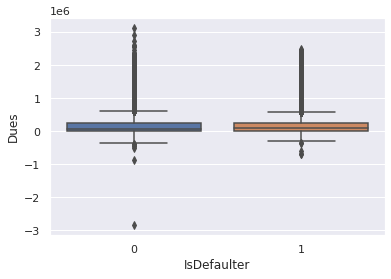

In [75]:
#plotting dues using boxplot
sns.boxplot(data = balanced_df, x = 'IsDefaulter', y = 'Dues' )

In [76]:
#rename column names
balanced_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


## **Label encoding**

In [77]:
#Label encoding implemented
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
balanced_df = balanced_df.replace(encoders_nums)

## **One hot encoding**

In [78]:
#One Hot encoding implemented on Education and marriage features
balanced_df = pd.get_dummies(balanced_df,columns=['EDUCATION','MARRIAGE'])

## **Dropping columns**

In [79]:
#drop columns
balanced_df.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [80]:
#drop columns
balanced_df.drop('ID',axis = 1, inplace = True)

## **Creating 6 groups in AGE feature**

In [81]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
balanced_df['AGE'] = pd.cut(balanced_df['AGE'],bins=bins, labels=labels,right=False)

# Covert categorical column into integer by extracting the code of the categories
balanced_df.AGE = balanced_df.AGE.cat.codes

## **Correlation Heatmap**

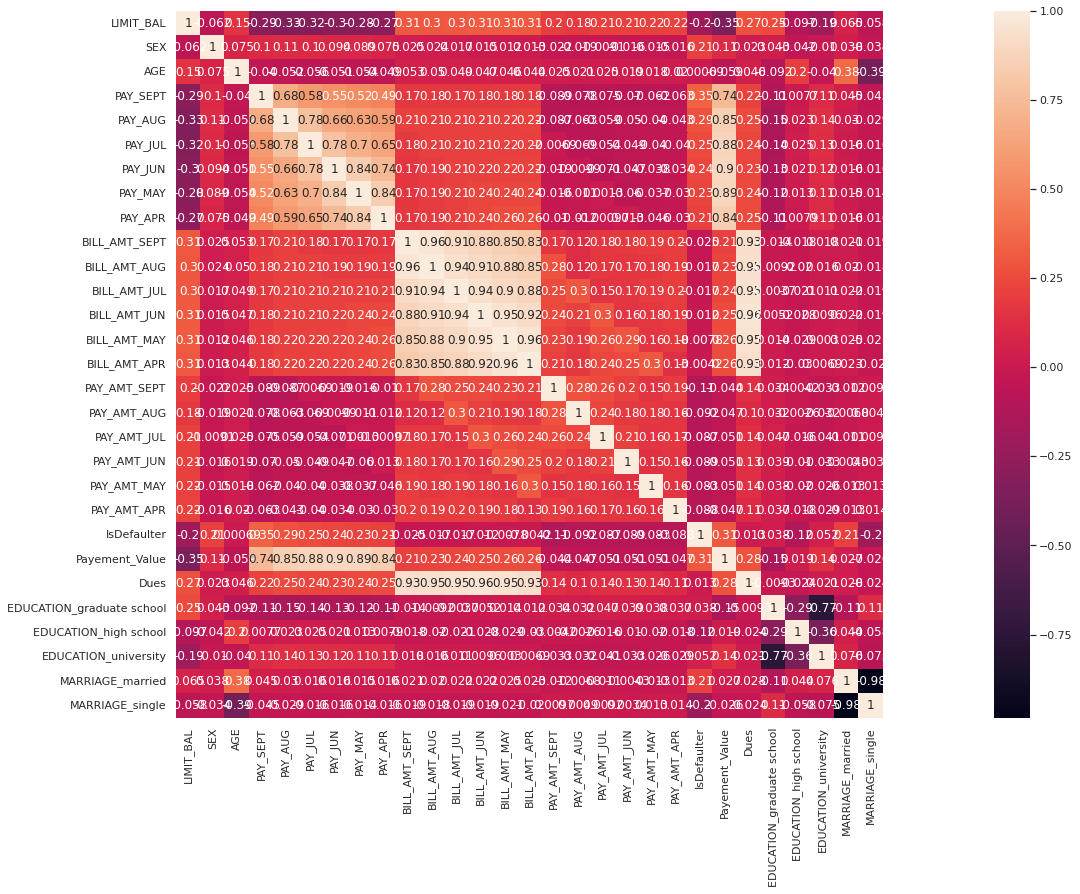

In [87]:
#plot heatmap

correlation = balanced_df.corr()
plt.subplots(figsize=(40,13))
sns.heatmap( correlation, square=True, annot=True)

## **Separating Independent and Dependent variables**

In [88]:
#Independent variables 
X = balanced_df.drop(columns=['IsDefaulter','Payement_Value','Dues'],axis=1)
#dependent variable
y = balanced_df['IsDefaulter']

In [89]:
cols = X.columns

## **Rescaling values using StandardScaler**

In [90]:
#Rescaling independent features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Train test split**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)

# **Model Training and Hyper Parameter Tuning**

## **1. Logistic Regression**

In [92]:
#create parameter grid to feed during hyperparameter tuning
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

### **Hyperparameter tuning of Logistic Regression**

In [93]:
#Instanstiate Grid Search CV
grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)

#fit the grid search
grid_lr.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [94]:
#get best parameters
grid_lr.best_params_

{'C': 100, 'penalty': 'l2'}

In [95]:
#get best estimator
optimized_val = grid_lr.best_estimator_

In [96]:
#get best score
grid_lr.best_score_

0.7236234675471582

In [97]:
# Get the predicted classes
train_class_preds = optimized_val.predict(X_train)
test_class_preds = optimized_val.predict(X_test)

In [98]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)
#get scores of various metrics
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on train data is  0.7235928949218869
The accuracy on test data is  0.7206648120408018
The precision on test data is  0.7293479811670709
The recall on test data is  0.7168700042069835
The f1 on test data is  0.723055162659123
The roc_score on test data is  0.7207317500709715


In [99]:
y_preds_proba_lr = optimized_val.predict_proba(X_test)[::,1]

### **Confusion matrix of Logistic Regression**

[[4991 2019]
 [1897 5112]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

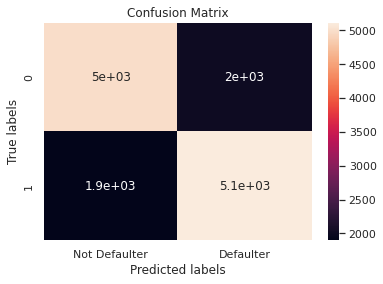

In [100]:
# Get the confusion matrix for both train and test
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

### **Feature importance of Logistic Regression**

In [101]:
feature_importance = pd.DataFrame({'Features':cols, 'Importance':np.abs(optimized_val.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

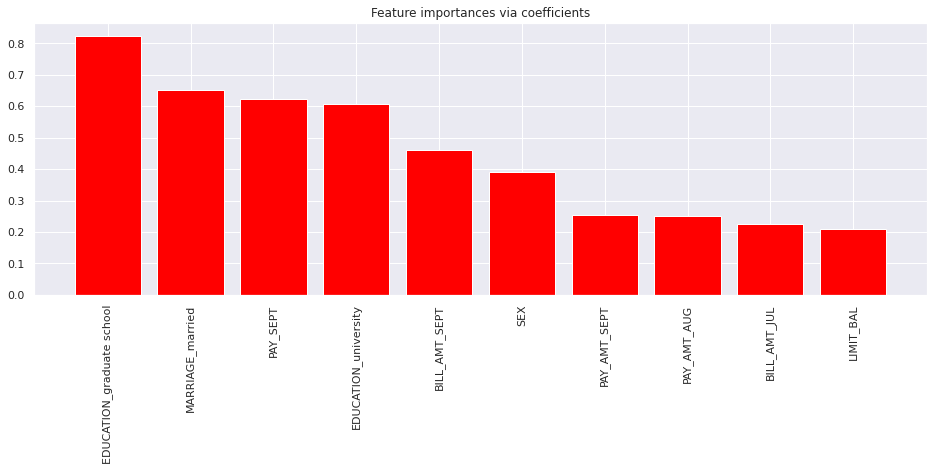

In [150]:
#plot feature importance
plt.figure(figsize=(16,5))
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'],color='red')
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.show()


## **2.Random Forest Classifier**

In [105]:
#Instantiate Random Forest Classifier
rf_clf = RandomForestClassifier()

#Fit the model
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [106]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [107]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)
# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9976764804793787
The accuracy on test data is  0.8355089521363863
The precision on test data is  0.8158082465401626
The recall on test data is  0.849249962869449
The f1 on test data is  0.8321932760879057
The roc_score on test data is  0.8360304165157018


### **Hyperparameter tuning of Random Forest**

In [108]:
# Create parameter grid  
param_grid = {
    'max_depth': [10,20,30],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 8, 10],
    'n_estimators': [100, 150, 200]
}

In [109]:
# Instantiate grid search model
grid_search = RandomizedSearchCV(estimator = rf_clf,param_distributions= param_grid,  scoring = 'accuracy',  
                          cv = 3, n_jobs = -1, verbose = 1)

In [110]:
# Fit grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 8, 10],
                                        'n_estimators': [100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [111]:
#get best parameters
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 150}

In [112]:
#get best score
grid_search.best_score_

0.8115503378275092

In [113]:
#get best estimator which can be used for prediction
optimal_rf_clf = grid_search.best_estimator_

In [114]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [115]:
test_class_preds

array([0, 0, 1, ..., 1, 1, 0])

In [116]:
y_test

29016    0
21824    0
14861    1
22112    0
28423    0
        ..
40319    1
17314    0
41277    1
14941    1
17503    0
Name: IsDefaulter, Length: 14019, dtype: int64

In [117]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

# Get scores of various metrics
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on train data is  0.9659420954477361
The accuracy on test data is  0.8247378557671731
The precision on test data is  0.7992580967327721
The recall on test data is  0.8421527360192423
The f1 on test data is  0.8201449381450846
The roc_score on test data is  0.8255829514221364


In [118]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

### **Confusion matrix of RF**

[[5960 1050]
 [1407 5602]]


[Text(0.5, 0, 'Not Defaulter'), Text(1.5, 0, 'Defaulter')]

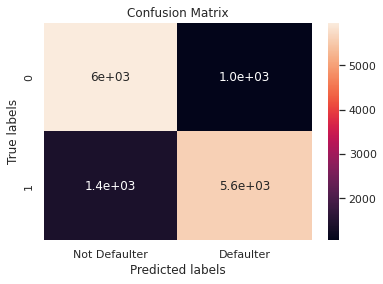

In [119]:
#Plotting Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

### **Feature Importance of Random Forest Model**

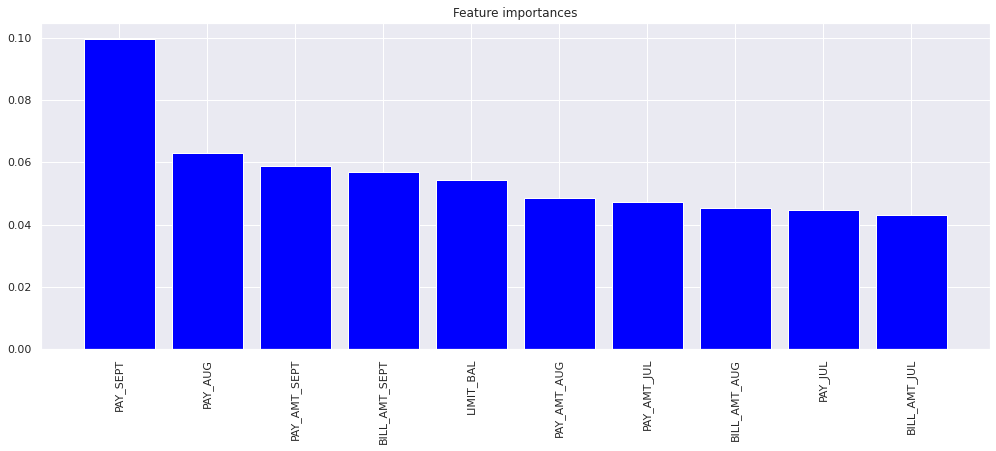

In [120]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = cols,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="blue",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 90)
plt.show()

## **3. XGBoost**

In [121]:
#import XGBClassifier
from xgboost import  XGBClassifier

In [122]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)


In [123]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [124]:
#training our model 
num_round=50
xg=xgb.train(parameters,dtrain,num_round) 

In [125]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)

In [126]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [127]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)
#get scores of various metrics
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on train data is  0.8069032987862668
The accuracy on test data is  0.7860760396604608
The accuracy on test data is  0.7860760396604608
The precision on test data is  0.7391924668283635
The recall on test data is  0.8156486146095718
The f1 on test data is  0.7755407529376545
The roc_score on train data is  0.7886120991399236


### **Hyperparameter tuning of XGB**

In [128]:
#create parameter grid
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

# Instantiate grid search model
gsearch_xgb = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)

In [129]:
#fit grid search
gsearch_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [130]:
#get best score
gsearch_xgb.best_score_

0.826622642086276

In [131]:
#get best parameters
gsearch_xgb.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [132]:
#get best estimator
optimal_xgb = gsearch_xgb.best_estimator_

In [133]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [134]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_score_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_score_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on test data is ", test_roc_score_xgb_tuned)

The accuracy on train data is  0.9473845119080375
The accuracy on test data is  0.8339396533276268
The accuracy on test data is  0.8339396533276268
The precision on test data is  0.8079611927521758
The recall on test data is  0.8522197140707298
The f1 on test data is  0.8295005126702798
The roc_score on test data is  0.8348432446133416


In [135]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

### **Confusion matrix of XGB**

[[6028  982]
 [1346 5663]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

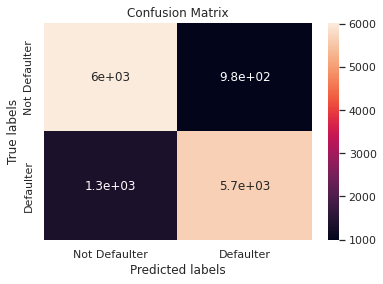

In [136]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Feature Importance of XGB**

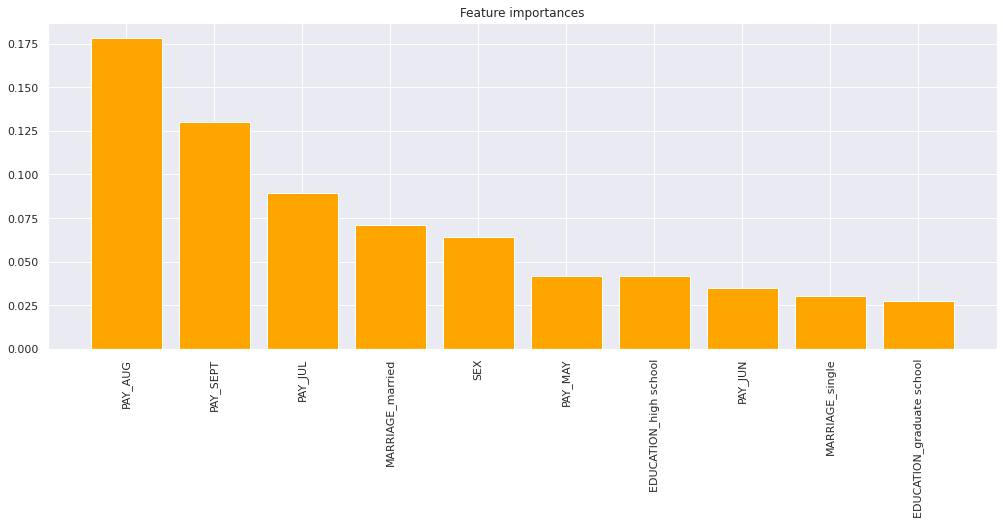

In [137]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = cols,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="orange",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 90)
plt.show()

## **Evaluating the models**

In [138]:
classifiers = ['Logistic Regression', 'Random Forest Classifier', 'Xgboost Classifier']
train_accuracy = [train_accuracy_lr, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_rf, test_precision_score_xgb_tuned]
recall_score = [test_recall_score_lr,test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_rf, test_f1_score_xgb_tuned]

In [139]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })


,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.723593,0.720665,0.729348,0.716870,0.723055
1,Random Forest Classifier,0.965942,0.824738,0.799258,0.842153,0.820145
2,Xgboost Classifier,0.947385,0.833940,0.807961,0.852220,0.829501


## **ROC-AUC Curve on all Models**

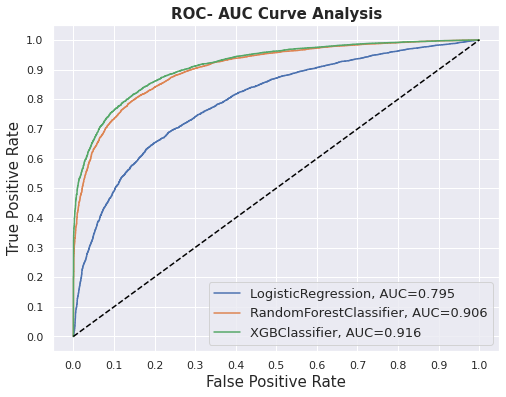

In [140]:
classifiers_proba = [(optimized_val, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.loc[i]['classifiers'], result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC- AUC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Conclusion**

* To end stage by sucessfully building a model to predict whether the customer will default his / her payment

* We have performed feature engineering, feature selection, hyperparameter tuning to prevent overfitting and for decresing error.

* The recall is the measure of our model correctly identifying True Positives. Thus, for all the Customers who actually default, recall tells us how many we correctly identified as is default.

* As we had considered recall, XGBoost is our best model as we can see roc aoc curve is maximum.